## Neural Network classification with PyTorch

Classification is a problem of precting whether something is one thing or another (there can be multiple things as the options)

## 1. Get classification data and get it ready

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import pandas as pd

# Make 1000 samples

n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
# First 5 samples of X and y:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
# Creata a pandas DataFrame

circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label":y})
circles

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


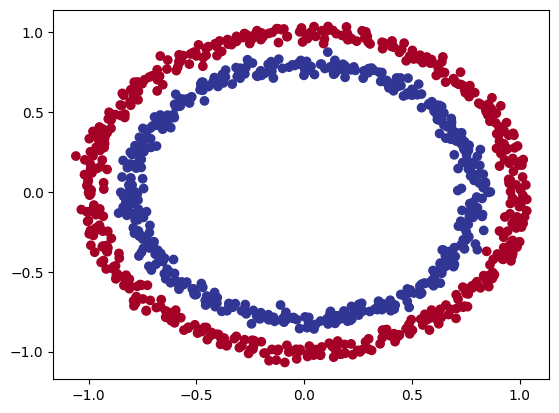

In [ ]:
# Visualise the data
plt.scatter(x=X[:, 0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)

### 1.1 Check input and ouput shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
X_sample, y_sample, X_sample.shape, y_sample.shape

(array([0.75424625, 0.23148074]), 1, (2,), ())

### 1.2 Turn data into tensors and split it into train and test sets

In [ ]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

In [ ]:
X.shape, y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

## 2. Building a model

Let's build a model to classify the blue and red dots.

To do so, we want to:

1. Set up device independent code
2. Construct a model (by inheriting from nn.Module)
3. Define a loss function and optimizer
4. Create a training and test loop


In [ ]:
# Device independent code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

Now it is time to build a model with these steps:

1. Subclass `nn.Module`
2. Create 2 `nn.Linear()` layers that are capable of handling the shape of the data
3. Define a `forward()` method that outlines the forward pass of the model
4. Instantiate an instance of the model and send it to the target device

In [ ]:
# 1. Create a class that subclasses nn.Module

class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear() layers
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 features and upscales to 5 numbers
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from layer 1 and returns 1 feature

  # 3. Define a forward method that outlines the forward pass of the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer2(self.layer1(x)) # x -> layer 1 -> layer 2

  # 4. Instantiate an instance of the model class and send it to the target device

model_0 = CircleModel().to(device)
model_0, model_0.state_dict()

(CircleModel(
   (layer_1): Linear(in_features=2, out_features=5, bias=True)
   (layer_2): Linear(in_features=5, out_features=1, bias=True)
 ),
 OrderedDict([('layer_1.weight',
               tensor([[-0.3023,  0.5517],
                       [ 0.1317, -0.6772],
                       [-0.2494,  0.4455],
                       [ 0.0730, -0.2315],
                       [-0.3556, -0.3678]], device='cuda:0')),
              ('layer_1.bias',
               tensor([-0.1558,  0.2479, -0.1267,  0.3481, -0.4026], device='cuda:0')),
              ('layer_2.weight',
               tensor([[-0.1893, -0.1881, -0.2057, -0.4223,  0.3927]], device='cuda:0')),
              ('layer_2.bias', tensor([0.0894], device='cuda:0'))]))

In [ ]:
# We can use nn.Sequential to replicate the model above

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=32),
    nn.ReLU(),
    nn.Linear(in_features=32, out_features=32),
    nn.ReLU(),
    nn.Linear(in_features=32, out_features=1)
).to(device)

model_0, model_0.state_dict()

(Sequential(
   (0): Linear(in_features=2, out_features=32, bias=True)
   (1): ReLU()
   (2): Linear(in_features=32, out_features=32, bias=True)
   (3): ReLU()
   (4): Linear(in_features=32, out_features=1, bias=True)
 ),
 OrderedDict([('0.weight',
               tensor([[ 0.3151,  0.5119],
                       [-0.4706, -0.5907],
                       [-0.3251, -0.2462],
                       [-0.1469,  0.7071],
                       [-0.2823, -0.0280],
                       [-0.0140,  0.3930],
                       [-0.1065, -0.2737],
                       [-0.5618,  0.1959],
                       [-0.3870, -0.1645],
                       [-0.6152, -0.6195],
                       [-0.6730, -0.4335],
                       [-0.0452, -0.0834],
                       [-0.3966,  0.0470],
                       [-0.5718,  0.4515],
                       [ 0.1095, -0.2465],
                       [-0.6656,  0.2072],
                       [-0.0244, -0.4683],
                    

In [ ]:
model_0.eval()
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
untrained_preds[:10], y_test[:10]

(tensor([[-0.0421],
         [-0.0242],
         [-0.0775],
         [-0.0371],
         [-0.0421],
         [-0.0426],
         [-0.0085],
         [-0.0341],
         [-0.0803],
         [-0.0233]], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

For classfication type problems, common loss functions are either binary cross entropy or categorical cross entropy (cross entropy).

For optimizers, the two most common ones are SGD and Adam, but PyTorch has many other built in options.

* For the loss function we'll use the `nn.BCEWithLogitsLoss()`

In [ ]:
# loss_fn = nn.BCELoss() # BCELoss - required inputs to have gone through the sigmoid activation function
loss_fn = nn.BCEWithLogitsLoss() # This is the binary cross entropy function with the sigmoid activation function built in - more numerically stable

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:
# Calculate the accuracy - out of 100 examples, what percentage does the model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true.to(device), y_pred.to(device)).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Train the model

To train the model we need to build a training loop:

1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Perform backpropagation
5. Step the optimizer

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model are going to be raw **logits**

We can convert these **logits** by passing them to the some kind of activation function (e.g sigmoid for binary classification, softmax for multiclass classification)

Then we can convert the model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`

In [ ]:
# View the first 5 outputs of the forward pass on the test data
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0421],
        [-0.0242],
        [-0.0775],
        [-0.0371],
        [-0.0421]], device='cuda:0')

In [ ]:
y_test

tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0.,
        1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
        1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
        1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0.,
        1., 1.])

In [ ]:
# Use the sigmoid activation function on the model logits to turn them into prediction probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4895],
        [0.4939],
        [0.4806],
        [0.4907],
        [0.4895]], device='cuda:0')

For our prediction probability values, we need to perform a range-style rounding on them:
* `y_pred_probs` >= 0.5, `y=1`
* `y_pred_probs` < 0.5, `y=0`

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')

### 3.2 Build a training and testing loop

In [ ]:
# Set the number of epochs

epochs = 1000

# Put the data to the target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build a training and evaluation loop

for epoch in range(epochs):

  # Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits into prediction labels into prediction values]

  # 2. Calculate the loss and accuracy
  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects logits to be passed as the predicted value input
  acc = accuracy_fn(y_true=y_train, y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing

  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

    # 3. Print out information
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Train accuracy: {acc}\nTest loss: {test_loss} | Test accuracy: {test_acc}")


Epoch: 0 | Train loss: 0.6920194625854492 | Train accuracy: 50.0
Test loss: 0.6925968527793884 | Test accuracy: 50.0
Epoch: 100 | Train loss: 0.6799237132072449 | Train accuracy: 71.375
Test loss: 0.6841385364532471 | Test accuracy: 65.0
Epoch: 200 | Train loss: 0.6618173122406006 | Train accuracy: 78.375
Test loss: 0.6693063974380493 | Test accuracy: 71.0
Epoch: 300 | Train loss: 0.6253049969673157 | Train accuracy: 88.25
Test loss: 0.6370116472244263 | Test accuracy: 85.5
Epoch: 400 | Train loss: 0.5496612191200256 | Train accuracy: 96.125
Test loss: 0.5707361102104187 | Test accuracy: 93.0
Epoch: 500 | Train loss: 0.4118989408016205 | Train accuracy: 98.625
Test loss: 0.44788992404937744 | Test accuracy: 97.5
Epoch: 600 | Train loss: 0.24933096766471863 | Train accuracy: 99.875
Test loss: 0.29324832558631897 | Test accuracy: 99.0
Epoch: 700 | Train loss: 0.13702112436294556 | Train accuracy: 100.0
Test loss: 0.17921613156795502 | Test accuracy: 100.0
Epoch: 800 | Train loss: 0.08214

## 4. Make predictions and evaluate the model

From the metrics it looks like the model isn't doing doing very well

So to inspect it we can make some predictions and plot them on a graph

To do so, we're going to import a function called `plot_decision_boundary()`

In [ ]:
import requests
from pathlib import Path

# Download helper functions from the learn pytorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
  print("helper_function.py already exists")
else:
  print("downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


helper_function.py already exists


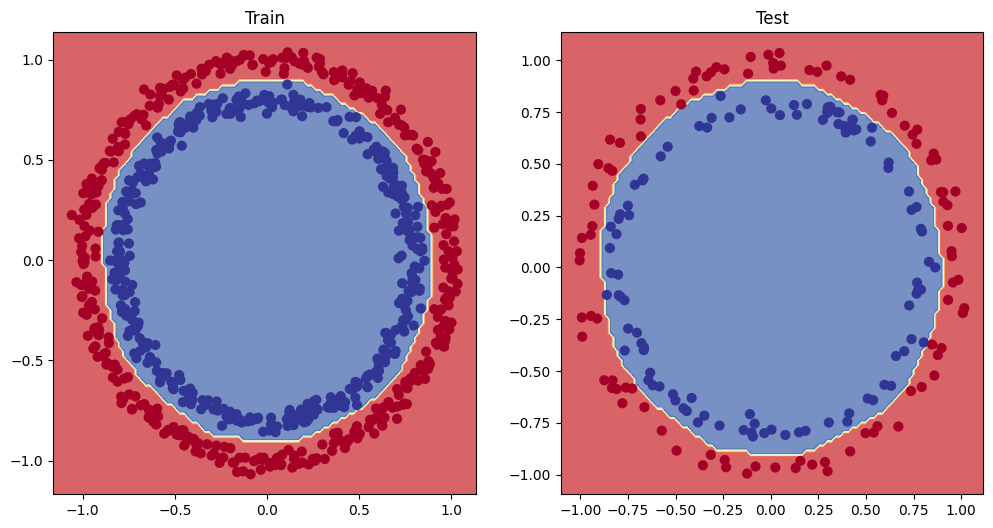

In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary
# Plot decision boundary of the model

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - give the model more chances to learn about the patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they all deal directly with the model, rather than the data.

And because these options are all values we can change they are referred to as **hyperparameters**.

Let's try to improve the model by:
* Adding more hidden units
* Increase the number of layers
* Increase the number of epochs

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer3 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    l = self.layer1(x)
    l = self.layer2(l)
    l = self.layer3(l)
    return l

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function

loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

In [ ]:
epochs = 5000

# Put the data to the target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build a training and evaluation loop

for epoch in range(epochs):

  # Training
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits into prediction labels into prediction values]

  # 2. Calculate the loss and accuracy
  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects logits to be passed as the predicted value input
  acc = accuracy_fn(y_true=y_train, y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing

  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

    # 3. Print out information
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Train accuracy: {acc}\nTest loss: {test_loss} | Test accuracy: {test_acc}")

Epoch: 0 | Train loss: 0.6992635726928711 | Train accuracy: 50.0
Test loss: 0.7009655833244324 | Test accuracy: 50.0
Epoch: 100 | Train loss: 0.6955245733261108 | Train accuracy: 57.875
Test loss: 0.6968970894813538 | Test accuracy: 55.50000000000001
Epoch: 200 | Train loss: 0.6941941380500793 | Train accuracy: 52.87500000000001
Test loss: 0.6954163908958435 | Test accuracy: 53.5
Epoch: 300 | Train loss: 0.6936681866645813 | Train accuracy: 51.74999999999999
Test loss: 0.6948292851448059 | Test accuracy: 52.0
Epoch: 400 | Train loss: 0.6934316158294678 | Train accuracy: 51.37500000000001
Test loss: 0.6945785284042358 | Test accuracy: 52.5
Epoch: 500 | Train loss: 0.6933072805404663 | Train accuracy: 51.0
Test loss: 0.6944649815559387 | Test accuracy: 49.5
Epoch: 600 | Train loss: 0.6932309865951538 | Train accuracy: 50.875
Test loss: 0.694412350654602 | Test accuracy: 49.5
Epoch: 700 | Train loss: 0.6931780576705933 | Train accuracy: 51.0
Test loss: 0.6943896412849426 | Test accuracy: 

### 5.1 Preparing data to see if our model can fit a straight line

One way to troubleshoot a larger problem is to test out a smaller problem

In [ ]:
# Create some data

weight = 0.7
bias = 0.3

X_regression = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

In [ ]:
# Train test split

X_train_regression, X_test_regression, y_train_regression, y_test_regression = train_test_split(X_regression, y_regression, test_size = 0.2)

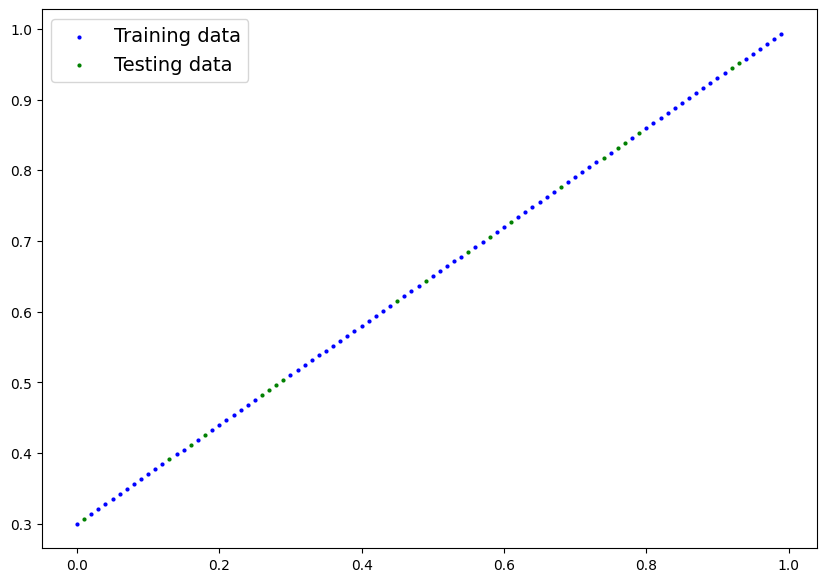

In [ ]:
plot_predictions(train_data = X_train_regression, train_labels = y_train_regression, test_data = X_test_regression, test_labels = y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line



In [ ]:
# Same architecture as model_1:

model_2 = nn.Sequential(
    nn.Linear(in_features = 1, out_features = 10),
    nn.Linear(in_features = 10, out_features = 10),
    nn.Linear(in_features = 10, out_features = 1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer

loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_2.parameters(), lr = 0.001)

In [ ]:
# Train the model

epochs = 5000

X_train_regression, X_test_regression = X_train_regression.to(device), X_test_regression.to(device)
y_train_regression, y_test_regression = y_train_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()

  y_pred = model_2(X_train_regression)

  loss = loss_fn(y_pred, y_train_regression)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)

    test_loss = loss_fn(test_pred, y_test_regression)

  if epoch % 500 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss} | Test_loss: {loss}")


Epoch: 0 | Train loss: 0.5268183946609497 | Test_loss: 0.5268183946609497
Epoch: 500 | Train loss: 0.08091271668672562 | Test_loss: 0.08091271668672562
Epoch: 1000 | Train loss: 0.005635361187160015 | Test_loss: 0.005635361187160015
Epoch: 1500 | Train loss: 0.0015042771119624376 | Test_loss: 0.0015042771119624376
Epoch: 2000 | Train loss: 0.0015995715511962771 | Test_loss: 0.0015995715511962771
Epoch: 2500 | Train loss: 0.0016944591188803315 | Test_loss: 0.0016944591188803315
Epoch: 3000 | Train loss: 0.001969973323866725 | Test_loss: 0.001969973323866725
Epoch: 3500 | Train loss: 0.0020606580656021833 | Test_loss: 0.0020606580656021833
Epoch: 4000 | Train loss: 0.0021497320849448442 | Test_loss: 0.0021497320849448442
Epoch: 4500 | Train loss: 0.0022363606840372086 | Test_loss: 0.0022363606840372086


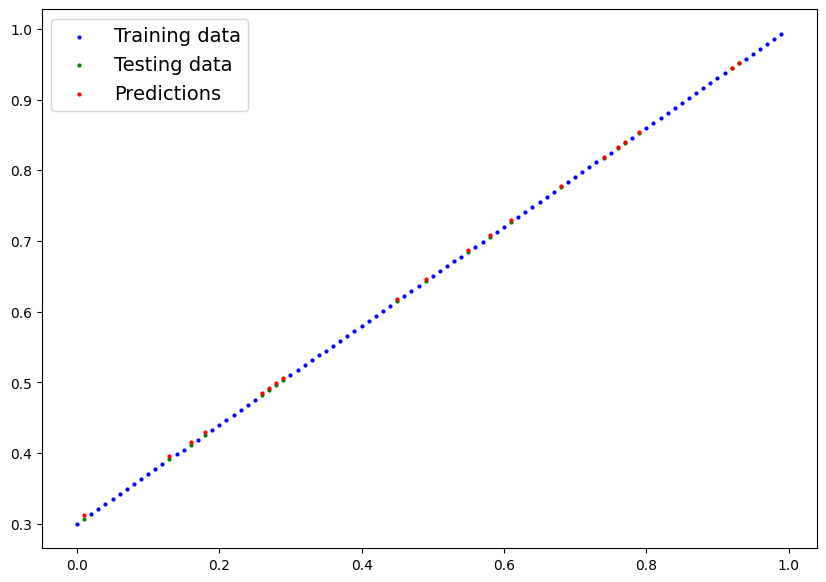

In [ ]:
model_2.eval()
with torch.inference_mode():
  predictions = model_2(X_test_regression)
plot_predictions(train_data = X_train_regression.cpu(), train_labels = y_train_regression.cpu(), test_data = X_test_regression.cpu(), test_labels = y_test_regression.cpu(), predictions=predictions.cpu())

## 6. The missing piece: non-linearity

In machine learning, you can draw any kind of pattern by using linear and non-linear functions.

### 6.1 Recreating non-linear data

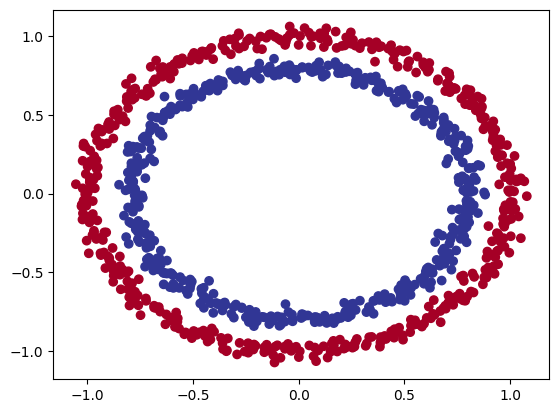

In [ ]:
# Make and plot data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then train test split
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X_train[:5]

tensor([[-1.0206,  0.0337],
        [-0.1512, -0.9601],
        [-0.1721, -0.7831],
        [ 0.8255,  0.1644],
        [ 0.2497, -0.9706]])

### 6.2 Building a model with non-linearity

In [ ]:
# Build a model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(in_features=2, out_features=10)
    self.layer2 = nn.Linear(in_features=10, out_features=10)
    self.layer3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    # Where should we put our non-linear activation functions?
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)


### 6.3 Training a model with non-linearity

In [ ]:

epochs = 5000

# Put the data to the target device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build a training and evaluation loop

for epoch in range(epochs):

  # Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits into prediction labels into prediction values]

  # 2. Calculate the loss and accuracy
  loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects logits to be passed as the predicted value input
  acc = accuracy_fn(y_true=y_train, y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing

  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true = y_test, y_pred = test_pred)

    # 3. Print out information
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Train loss: {loss} | Train accuracy: {acc}\nTest loss: {test_loss} | Test accuracy: {test_acc}")

Epoch: 0 | Train loss: 0.6942307949066162 | Train accuracy: 46.625
Test loss: 0.6887022852897644 | Test accuracy: 54.50000000000001
Epoch: 100 | Train loss: 0.6891265511512756 | Train accuracy: 59.375
Test loss: 0.6952369809150696 | Test accuracy: 50.5
Epoch: 200 | Train loss: 0.6862813234329224 | Train accuracy: 56.75
Test loss: 0.6941967606544495 | Test accuracy: 49.5
Epoch: 300 | Train loss: 0.6833723187446594 | Train accuracy: 54.37499999999999
Test loss: 0.6926179528236389 | Test accuracy: 48.0
Epoch: 400 | Train loss: 0.6800435781478882 | Train accuracy: 54.50000000000001
Test loss: 0.6903929710388184 | Test accuracy: 48.0
Epoch: 500 | Train loss: 0.6758443117141724 | Train accuracy: 55.625
Test loss: 0.6870530843734741 | Test accuracy: 48.5
Epoch: 600 | Train loss: 0.6702679991722107 | Train accuracy: 64.0
Test loss: 0.6817716956138611 | Test accuracy: 55.50000000000001
Epoch: 700 | Train loss: 0.6622797846794128 | Train accuracy: 63.74999999999999
Test loss: 0.6739761829376221 

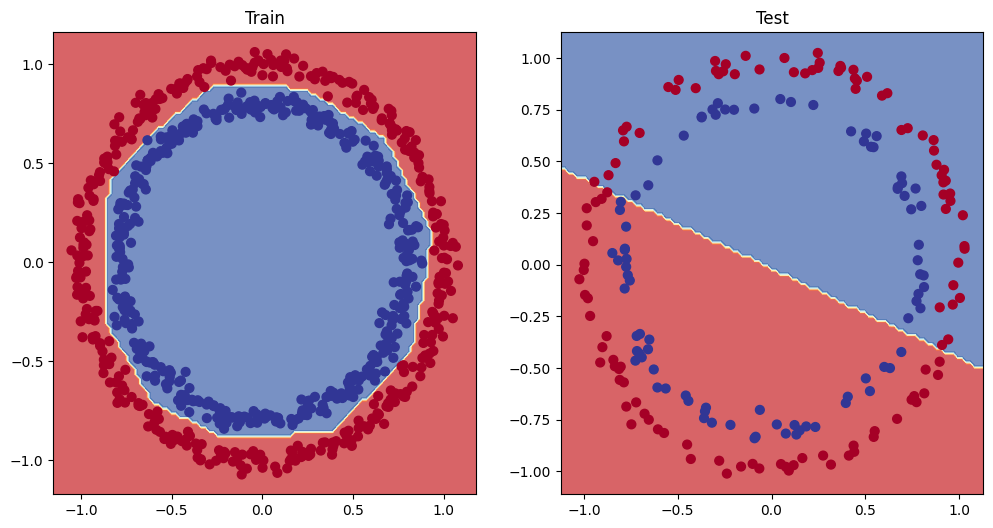

In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary
# Plot decision boundary of the model

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## 7. Replicating non-linear activation functions

In [ ]:
# Create a tensor

A = torch.arange(-10, 10, 1).type(torch.float)

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

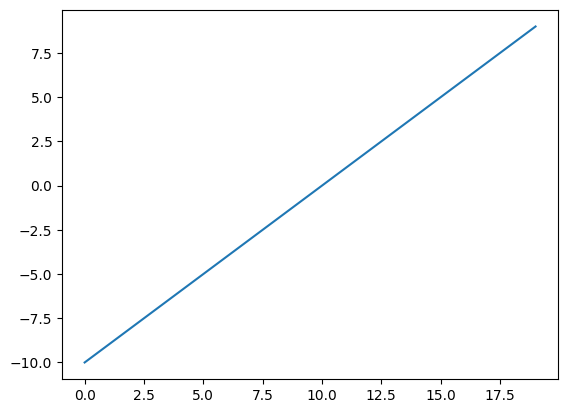

In [ ]:
plt.plot(A)

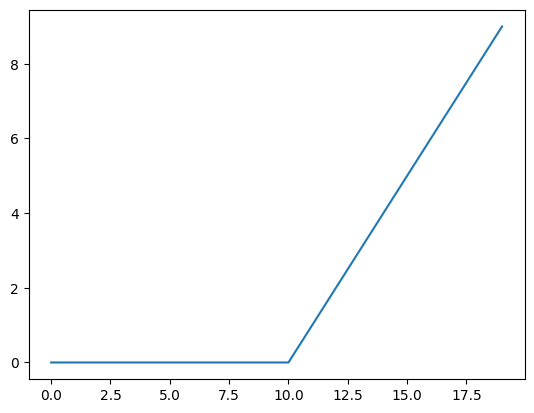

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x :torch.Tensor) -> torch.Tensor:
  return torch.max(torch.tensor(0), x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

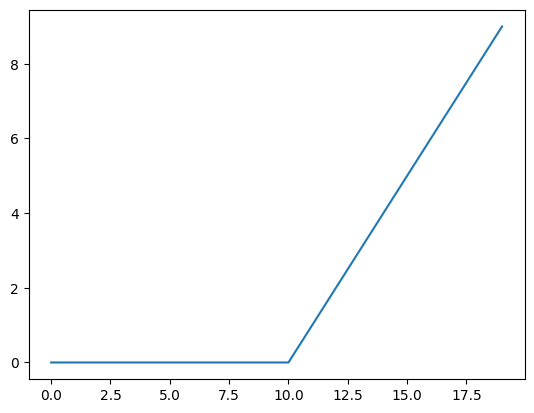

In [ ]:
plt.plot(relu(A))

## 8. Putting it all together with a multi-class classification problem

### 8.1 Creating a toy multi-class dataset

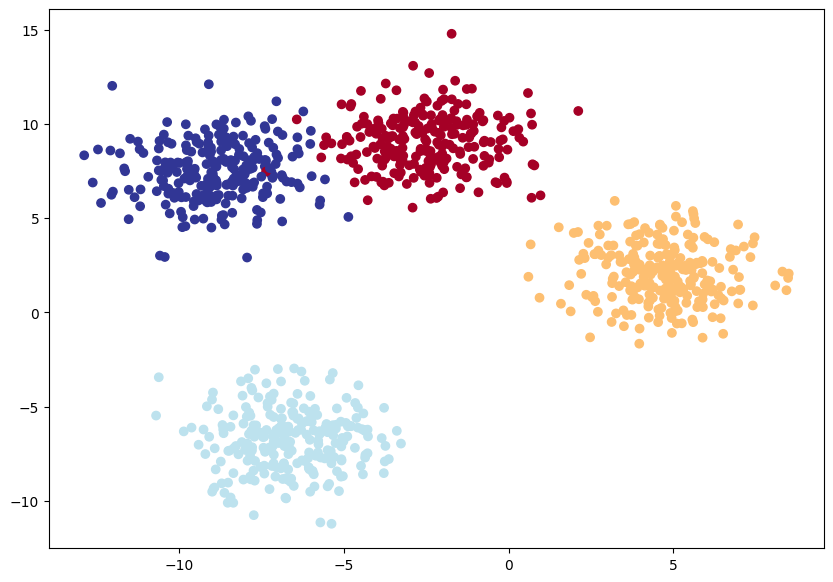

In [40]:
# Import dependencies
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42
# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Train test split
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

# 4. Plot the data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classification model

In [41]:
# Create device independent code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [42]:
# Build a multi-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2, output_features=4).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

### 8.3 Create a loss function and an optimizer for a multi-class classification model

In [43]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.01)

### 8.4 Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate and train and test the model we need to convert the model's outputs (logits) to prediction probabilities and then to prediction labels

logits -> prediction probabilities -> labels

In [44]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))
y_logits[:10], X_blob_test[:10]

(tensor([[ 0.4034, -0.9142,  0.1281,  0.4932],
         [ 0.3156, -0.7560,  0.1728,  0.1125],
         [-0.3774, -1.6594, -0.3312, -0.7651],
         [ 0.3458, -0.7746,  0.1621,  0.3537],
         [ 0.3473, -1.2768, -0.1786,  0.6211],
         [ 0.3007, -0.8508,  0.1000,  0.1159],
         [-0.2168, -1.7723, -0.2920, -0.4958],
         [ 0.3093, -1.0909, -0.1111,  0.4728],
         [-0.6257, -1.6139, -0.4442, -1.1723],
         [ 0.3114, -1.1186, -0.1260,  0.4904]], device='cuda:0'),
 tensor([[ 4.6675,  4.4878],
         [-7.9969,  6.8803],
         [-6.2801, -7.8571],
         [ 3.6833,  1.1767],
         [-0.1404, 10.1654],
         [-9.7570,  7.8658],
         [-4.4295, -8.5996],
         [-2.1731,  9.0332],
         [-9.2145, -7.5223],
         [-1.4015,  9.2713]]))

In [45]:
# To turn the logits into prediction probabilities in a multi-class classification problem we need to use the softmax activation function
y_pred_probs = torch.softmax(y_logits, 1)
y_pred_probs[:10]

tensor([[0.3204, 0.0858, 0.2433, 0.3505],
        [0.3305, 0.1132, 0.2865, 0.2698],
        [0.3329, 0.0924, 0.3487, 0.2259],
        [0.3158, 0.1030, 0.2628, 0.3183],
        [0.3223, 0.0635, 0.1905, 0.4238],
        [0.3372, 0.1066, 0.2759, 0.2803],
        [0.3454, 0.0729, 0.3204, 0.2613],
        [0.3246, 0.0800, 0.2132, 0.3822],
        [0.3174, 0.1182, 0.3806, 0.1838],
        [0.3246, 0.0777, 0.2096, 0.3882]], device='cuda:0')

In [46]:
# Convert our model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 0, 2, 3, 3, 0, 0, 3, 2, 3, 3, 3, 3, 3, 3, 0, 0, 2, 0, 2, 3, 3, 0, 2,
        2, 2, 0, 3, 3, 3, 0, 3, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0, 2, 3, 3, 0, 0,
        3, 3, 3, 3, 0, 3, 2, 2, 0, 3, 0, 2, 2, 3, 0, 2, 2, 3, 3, 0, 0, 3, 3, 3,
        0, 0, 2, 0, 0, 3, 0, 3, 3, 2, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 3, 2, 2, 0,
        3, 3, 0, 2, 3, 3, 3, 3, 2, 0, 3, 3, 0, 2, 3, 3, 3, 2, 2, 0, 3, 3, 3, 2,
        2, 0, 3, 0, 2, 3, 3, 3, 2, 0, 0, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 2,
        2, 2, 3, 0, 3, 2, 0, 3, 0, 2, 3, 3, 0, 0, 2, 3, 2, 3, 0, 2, 3, 0, 0, 3,
        0, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 2, 2, 3, 3, 0, 2, 3, 3,
        3, 0, 2, 3, 0, 3, 2, 3], device='cuda:0')

In [47]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training and testing loop for a mutli-class PyTorch model

In [49]:
epochs = 5000

X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  train_logits = model_4(X_blob_train)
  train_pred_probs = torch.softmax(train_logits, dim=1)

  train_preds = torch.argmax(train_pred_probs, dim=1)

  loss = loss_fn(train_logits, y_blob_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)


    test_pred_probs = torch.softmax(test_logits, dim=1)
    test_preds = torch.argmax(test_pred_probs, dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
  if epoch % 1000 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.046220988035202026 | Test loss: 0.03697677329182625
Epoch: 1000 | Train loss: 0.030481737107038498 | Test loss: 0.020976638421416283
Epoch: 2000 | Train loss: 0.028012478724122047 | Test loss: 0.01795784756541252
Epoch: 3000 | Train loss: 0.026991957798600197 | Test loss: 0.016629468649625778
Epoch: 4000 | Train loss: 0.026367224752902985 | Test loss: 0.015835115686058998
